In [34]:
!pip install statsmodels

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from statsmodels import api as sm

## Dados

In [36]:
dados = pd.read_csv('..\ArquivosParalelos\imobiliario.csv')

In [37]:
dados.shape

(3000, 7)

In [38]:
dados.info

<bound method DataFrame.info of       valor_aluguel  area_m2  ano_construcao  codigo_localidade  \
0         120.97436       35            1939                  1   
1         436.97433      104            1939                  1   
2         355.74360       29            1971                  2   
3         282.92310       39            1972                  2   
4         807.23080       97            1985                  1   
...             ...      ...             ...                ...   
2995      560.20514       68            1981                  2   
2996      454.00000       56            1970                  1   
2997      218.56410       76            1939                  1   
2998      739.84610       49            1994                  2   
2999      303.74360       41            1973                  1   

      numero_banheiros  numero_cozinhas  codigo_bairro  
0                    0                0           1112  
1                    1                0          

In [39]:
dados.dtypes

valor_aluguel        float64
area_m2                int64
ano_construcao         int64
codigo_localidade      int64
numero_banheiros       int64
numero_cozinhas        int64
codigo_bairro          int64
dtype: object

In [40]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


In [41]:
dados.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [42]:
dados.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


## Problema de Negócios e Análise Explortória

Existe alguma relação entre a área do imóvel (em metros quadrados) e o valor do aluguel? Caso exista, como podemos mensurá-la?

<Axes: xlabel='valor_aluguel', ylabel='Count'>

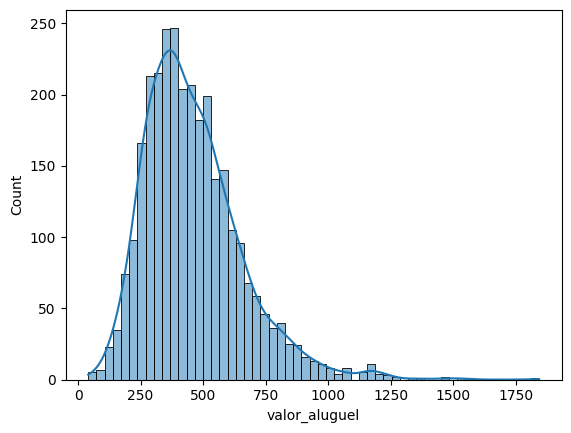

In [43]:
sbn.histplot(data = dados, x = 'valor_aluguel', kde = True)

In [44]:
dados.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


In [45]:
def força(x):
    if x < 0.3 and x > -0.3:
        a = 'Fracamente'
    elif x < 0.6 and x > -0.6:
        a = 'Parcialmente'
    elif x < 0.9 and x > -0.9:
        a = 'Fortemente'
    elif x < 1 and x > -1:
        a = 'Muito Fortemente'
    else:
        a = 'Autocorrelação'
    
    if x < 0:
        b = ' negativa'
    else:
        b = ' positiva'
    
    return a+b

dados.corr().applymap(força)

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,Autocorrelação positiva,Parcialmente positiva,Fracamente positiva,Fracamente positiva,Fracamente positiva,Fracamente positiva,Fracamente negativa
area_m2,Parcialmente positiva,Autocorrelação positiva,Fracamente negativa,Fracamente positiva,Fracamente positiva,Fracamente positiva,Fracamente negativa
ano_construcao,Fracamente positiva,Fracamente negativa,Autocorrelação positiva,Fracamente negativa,Fracamente positiva,Fracamente positiva,Parcialmente positiva
codigo_localidade,Fracamente positiva,Fracamente positiva,Fracamente negativa,Autocorrelação positiva,Fracamente positiva,Fracamente negativa,Fracamente negativa
numero_banheiros,Fracamente positiva,Fracamente positiva,Fracamente positiva,Fracamente positiva,Autocorrelação positiva,Fracamente positiva,Fracamente positiva
numero_cozinhas,Fracamente positiva,Fracamente positiva,Fracamente positiva,Fracamente negativa,Fracamente positiva,Autocorrelação positiva,Fracamente positiva
codigo_bairro,Fracamente negativa,Fracamente negativa,Parcialmente positiva,Fracamente negativa,Fracamente positiva,Fracamente positiva,Autocorrelação positiva


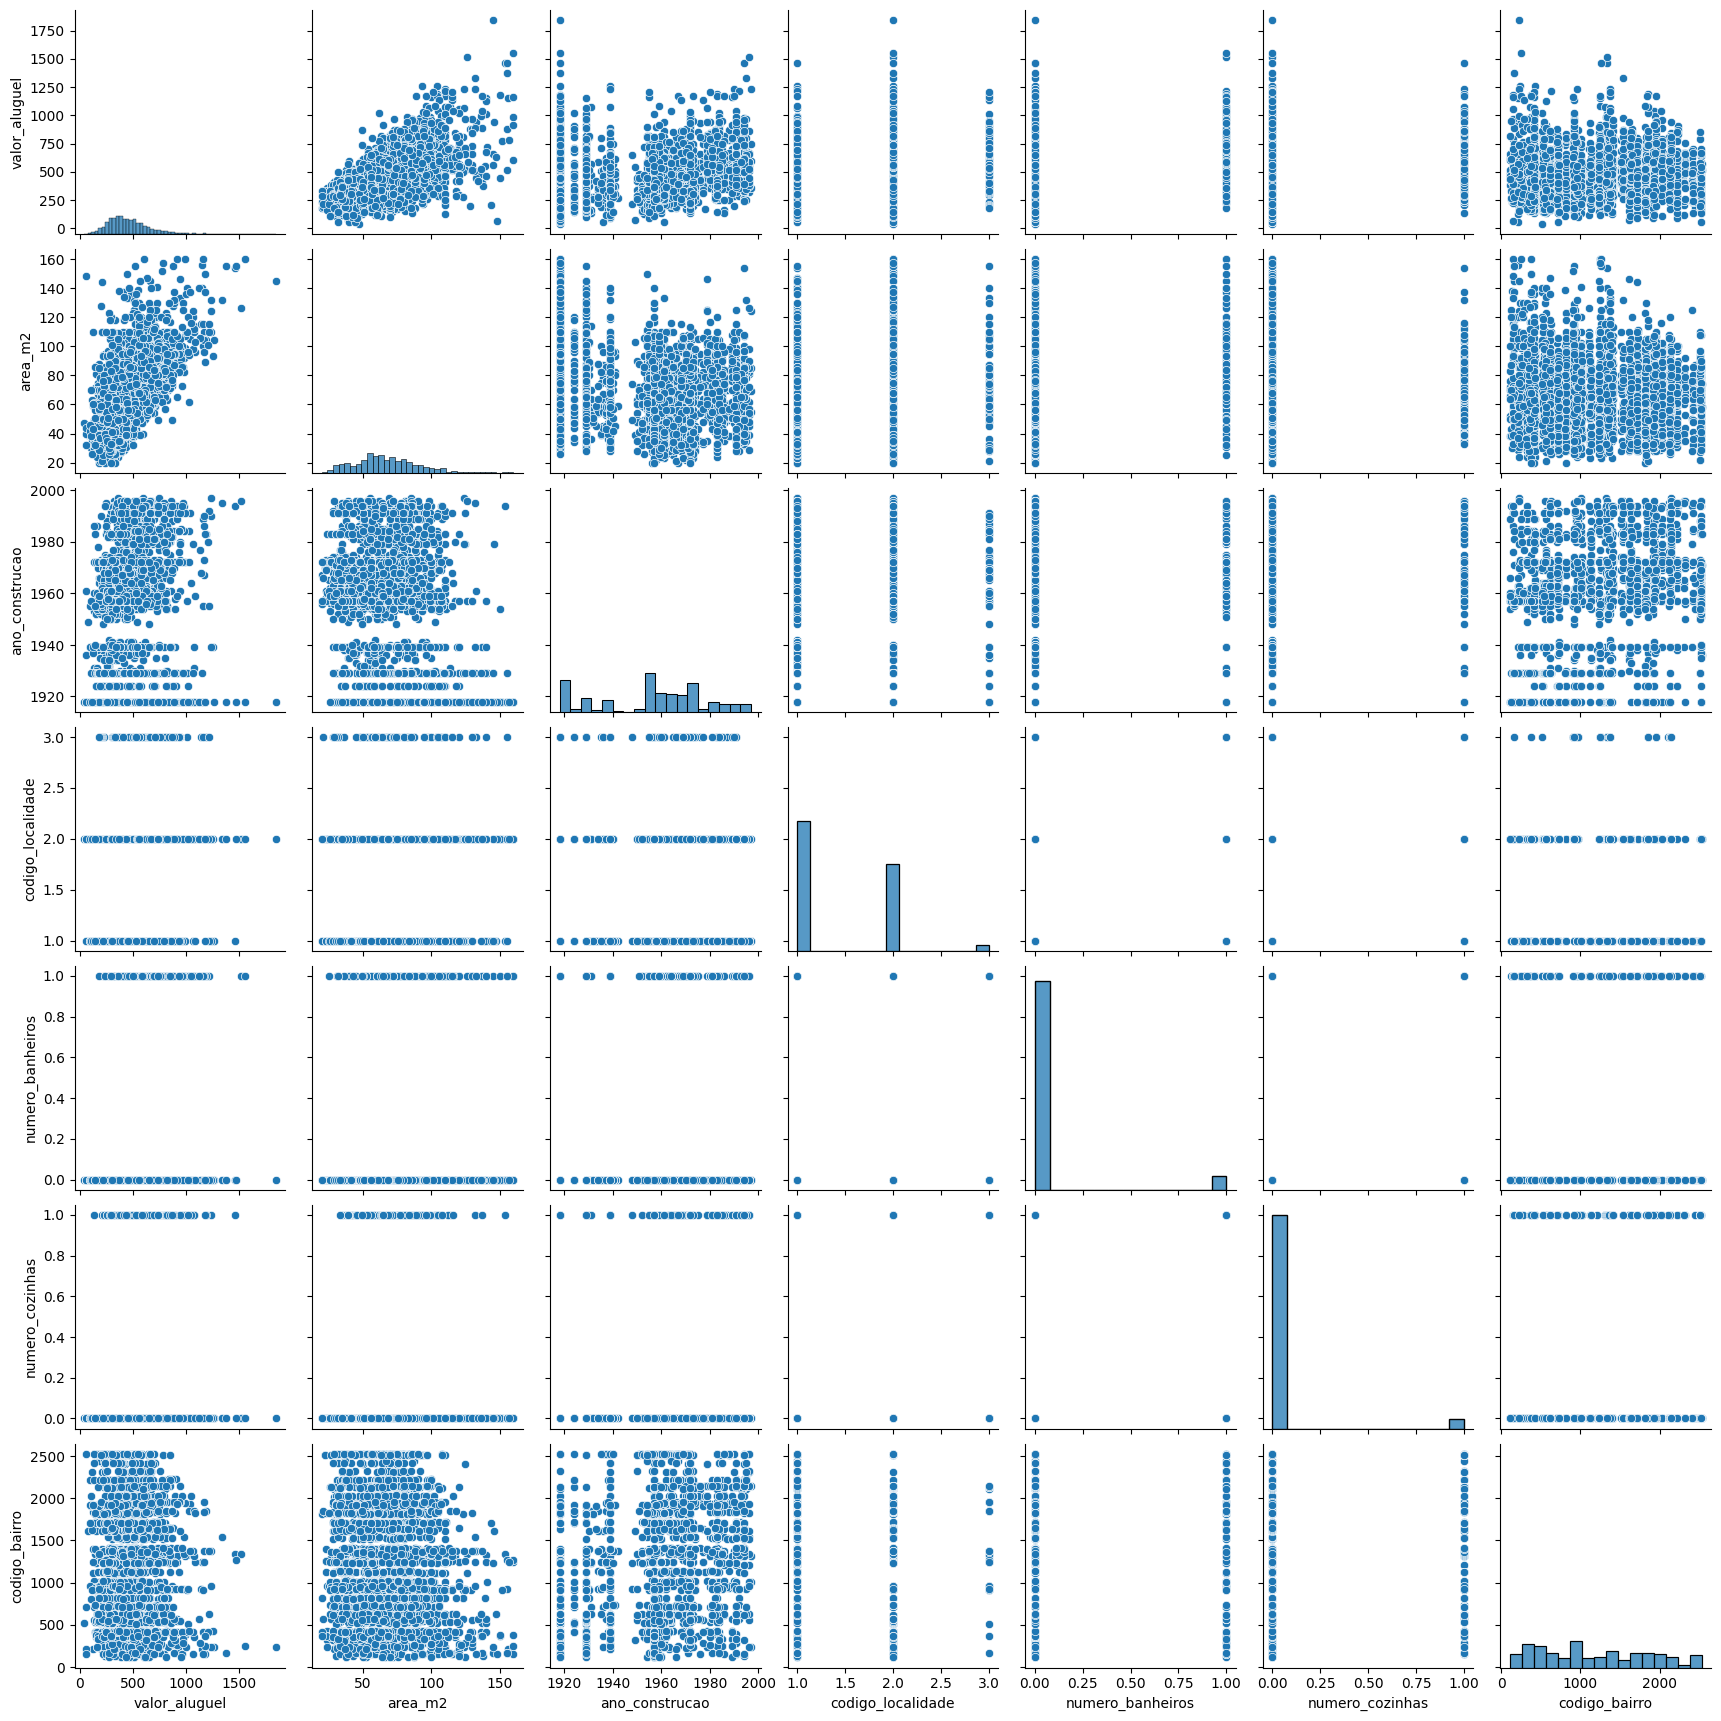

In [46]:
sbn.pairplot(dados)

<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

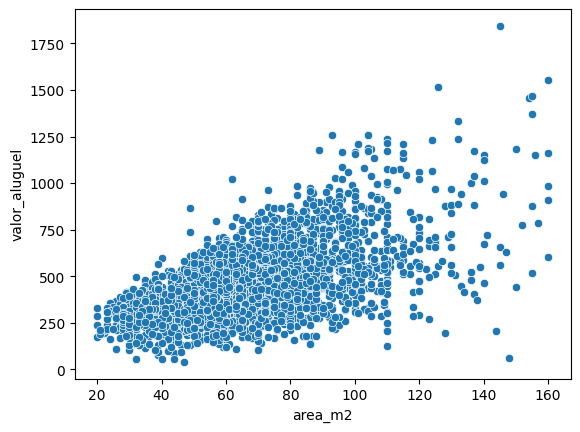

In [47]:
sbn.scatterplot(data = dados, x = 'area_m2', y = 'valor_aluguel')

## Regressão Linear Simples

### Ordinary Least Square

In [48]:
y = dados['valor_aluguel']
x = dados['area_m2']

# constante
x = sm.add_constant(x)

# a adição de constante transforma a série em um dataframe
x

,const,area_m2
0,1.0,35
1,1.0,104
2,1.0,29
3,1.0,39
4,1.0,97
...,...,...
2995,1.0,68
2996,1.0,56
2997,1.0,76
2998,1.0,49


In [55]:
# Obrigatoriamente, y vem antes de x.

modelo = sm.OLS(endog = y, exog = x, missing = 'drop')

# hasconst = True
    # e False, exclui a constante do modelo

resultado = modelo.fit()

print(resultado.summary())
print(type(resultado.summary()))

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          6.84e-275
Time:                        19:33:55   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

* ``Dep. Variable``: Variável dependente; y.
* ``Model``: modelo utilizado.
* `Method`: método do modelo.
* ``Date``: data da execução doajuste.
* ``Time``: horário de execução do ajuste.
* ``No. Observations``: tamanho da amostra.
* ``Df Residuals``: graus de liberdade residual .
  *  n-k, sendo n o tamanho da amostra e k o número de parâmetros.
  * Maior é melhor.
* ``Df Model``: graus de liberdade do modelo; número de parâmetros que foram estimados
  * k - 1
  * menor é melhor
* ``Covariance Type``:  método utilizado para estimar a matriz de covariância dos coeficientes de regressão; 
* ``R-squared``: percentual da variabilidade da variável independente que é explicada pelas variáveis independentes do modelo
  * R² = 1 - (SSE / SST); onde SSE é a soma dos quadrados dos resíduos (ou erros), e SST é a soma total dos quadrados da variável dependente.
* ``Adj. R-squared``: como o R², mas leva em conta o número de variáveis independentes e penaliza o modelo por cada variável adicional que não contribui significativamente para explicar a variação na variável dependente.
  * R² ajustado = 1 - [(n-1)/(n-k-1)] * (1-R²); onde n é o número de observações no modelo e k é o número de variáveis independentes.
* ``F-statistic``: teste estatístico utilizado para avaliar a significância geral do modelo, hipótese nula de que todos os coeficientes são iguais a zero, o que significa que o modelo não é significativamente melhor do que um modelo constante.
  * F = (R² / k) / [(1 - R²) / (n - k - 1)]
* ``Prob (F-statistic)``: p-valor da estatística F; a probabilidade de obter um valor tão alto para a estatística F mesmo que a hipótese nula seja verdadeira.
* ``Log-Likelihood`` (log da função de verossimilhança): medida usada para comparar modelos ajustados com uma mesma base de dados.
  * Quanto maior, melhor, em comparação com outro log-likelihood.
* ``AIC``(Akaike Information Criterion): medida de seleção de modelo levando em consideração a complexidade do modelo
  * AIC = -2 * Log-Likelihood + 2 * k, onde k é o número de parâmetros no modelo, incluindo a constante.
  * Quanto menor, melhor.
* ``BIC`` (Bayesian Information Criterion): é similar ao AIC, mas penaliza o modelo mais fortemente por ter um grande número de parâmetros.
  * BIC = -2 * Log-Likelihood + log(n) * k; onde k é o número de parâmetros no modelo, incluindo a constante e n é o tamanho da amostra.
  * Quanto menor, melhor.

###

* ``coef``: coeficientes estimados.
  * Em "const" é demonstrada a constante, que é o intercepto y.
* ``std err`` (standard error): medida da variabilidade da estimativa do coeficiente; representa a variação esperada do coeficiente se a regressão fosse repetida várias vezes com amostras diferentes da mesma população
* ``t`` (valor-t): indica o quanto o coeficiente é significativo.
  * t = coef/stderr 
* ``P>|t|`` (valor-p): significância do coeficiente, calculado como a probabilidade de obter um valor-t tão extremo, ou mais extremo ue o observado, se o coeficiente fosse realmente zero; indica a probabilidade de se cometer um erro do tipo I (rejeitar a hipótese nula quando ela é verdadeira) ao testar a hipótese de que o coeficiente é igual a zero.
  * Em geral, um valor-p abaixo de 0,05 indica que o coeficiente é estatisticamente significativo
* ``[0.025 0.975]``: mm geral, se o intervalo de confiança incluir o valor zero, então o coeficiente estimado não é estatisticamente significativo ao nível de confiança de 95%; um intervalo de confiança estreito indica maior precisão na estimativa do coeficiente, enquanto um intervalo de confiança largo indica menor precisão.

###

* ``Omnibus``: 
* ``Prob(Omnibus)``: 
* ``Skew``: 
* ``Kurtosis``: 
* ``Durbin-Watson``: 
* ``Jarque-Bera (JB)``: 
* ``Prob(JB)``: 
* ``Cond. No.``: 


**P-VALOR**

Probabilidade associada a um teste estatístico que diz a probabilidade de se obter determinado resultado por acaso e não pela tendência dos dados. em testes de hipótese, representa a probabilidade de a hipótese nula ser verdadeira enquanto o teste aponta que a hipótese alternativa é verdadeira.

**ESTATÍSTICA F**

Se a estatística F for grande e a probabilidade (valor-p) associada ao teste for menor que um nível de significância escolhido (geralmente 0,05), então podemos rejeitar a hipótese nula e concluir que pelo menos uma das variáveis independentes no modelo é significativamente relacionada à variável dependente. Isso significa que o modelo é significativamente melhor do que um modelo constante e as variáveis independentes incluídas no modelo contribuem para explicar a variação na variável dependente.

In [53]:
# Alteração do tipo de covariância
# Por padrão, o tipo é definido como "não robusto"

resultado_robusto = resultado.get_robustcov_results(cov_type='HAC', maxlags = 5)
print(resultado_robusto.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     857.7
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          4.93e-166
Time:                        17:08:03   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      9.938     13.453      0.0

* ``‘fixed scale’`` uses a predefined scale
* ``‘HC0’, ‘HC1’, ‘HC2’, ‘HC3’``: heteroscedasticity robust covariance
* ``‘HAC’``: heteroskedasticity-autocorrelation robust covariance. Exige parâmetro "maxlags" [int]: número de lags usados
* ``‘cluster’``: clustered covariance estimator. Exige "groups" [array_like [int]]: índices dos clusters ou grupos.
* ``‘hac-groupsum’``: Driscoll and Kraay, heteroscedasticity and autocorrelation robust covariance for panel data. Exige [time] array_like: índices de períodos; e "maxlags" [int].
* ``‘hac-panel’``: heteroscedasticity and autocorrelation robust standard errors in panel data. The data needs to be sorted in this case, the time series for each panel unit or cluster need to be stacked. The membership to a time series of an individual or group can be either specified by group indicators or by increasing time periods. One of groups or time is required. Exige "groups", "time" e "maxlags".


"Non-robust" ou "OLS" (Ordinary Least Squares): assume que os erros têm distribuição normal e homocedástica (ou seja, a mesma variância em todos os valores da variável independente); assume que os erros têm distribuição normal e homocedástica. Esse é o método padrão para a regressão linear.

"HC0" a "HC3" (Heteroscedasticity-consistent covariance matrix): leva em conta a heterocedasticidade (ou seja, a variação não constante dos erros em diferentes valores da variável independente), leva em conta a heterocedasticidade dos erros e pode ter erros-padrão maiores do que os resultados "Non-robust". Os métodos HC0 a HC3 diferem em como eles estimam a variância dos erros em diferentes valores da variável independente.

"HAC" (Heteroscedasticity and Autocorrelation Consistent): leva em conta a heterocedasticidade e a autocorrelação dos erros (ou seja, a correlação entre os erros em diferentes valores da variável independente). Este método é usado quando os erros não são independentes ao longo do tempo ou do espaço.